**Import Modules**

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

**Loading the dataset**

In [165]:
df=pd.read_csv('/content/drive/MyDrive/twitter.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [167]:
df.shape

(31962, 3)

**Preprocessing of dataset**

In [168]:
# remove pattern in the input txt
import re
def remove_pattern(input_txt, pattern):
  r=re.findall(pattern, input_txt)
  for word in r:
    input_txt = re.sub(word, ' ' ,input_txt)
    return(input_txt)

In [169]:
# remove tweeter handles ( @ user)

df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], '@[\w]*')
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0,bihday your majesty,None
3,4,0,#model i love u take with u all the time in ...,None
4,5,0,factsguide: society now #motivation,None


In [170]:
# remove special characters  numbers and puntuations

df['clean_tweet']=df['clean_tweet'].str.replace('@[^\s]+|#\w+' , " ")
df.head(11)



,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i can't use cause they...
2,3,0,bihday your majesty,None
3,4,0,#model i love u take with u all the time in ...,None
4,5,0,factsguide: society now #motivation,None
5,6,0,[2/2] huge fan fare and big talking before the...,None
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,None
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,None
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so !


In [171]:
# remove short words

df['clean_tweet']=df['clean_tweet'].apply(lambda x: ' ' .join([w for w in x.split() if len(w) > 3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks credit can't cause they don't offer whe...
2,3,0,bihday your majesty,None
3,4,0,#model i love u take with u all the time in ...,None
4,5,0,factsguide: society now #motivation,None


In [172]:
# indudial words considersd as tokens

tokenized_tweet=df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, credit, can't, cause, they, don't, of...
2                                               [None]
3                                               [None]
4                                               [None]
Name: clean_tweet, dtype: object

In [173]:
# stem the words

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence:[stemmer.stem(word)for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, credit, can't, caus, they, don't, offe...
2                                               [none]
3                                               [none]
4                                               [none]
Name: clean_tweet, dtype: object

In [174]:
# combin ewords into single sentence
for i in  range(len(tokenized_tweet)):
  tokenized_tweet[i]= " ".join(tokenized_tweet[i])
  df['clean_tweet']=tokenized_tweet
  df.head()

**Exploratoruy data analysis**


In [175]:
# visualize the frequent words
! pip install wordcloud


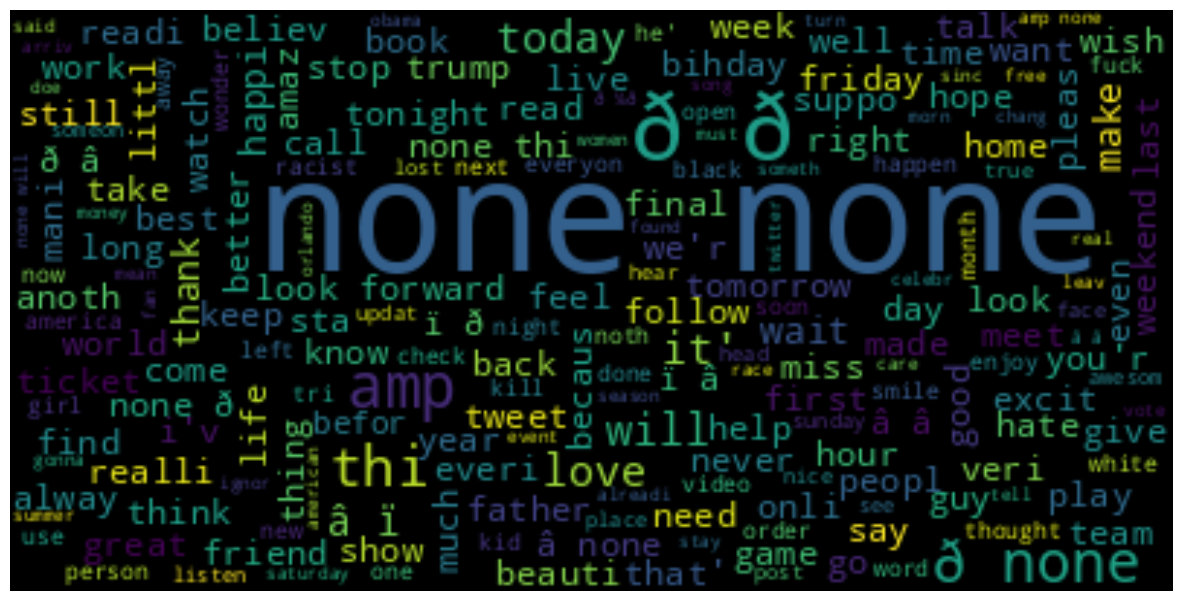

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words= ' '.join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud

wc=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
wordcloud = WordCloud().generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

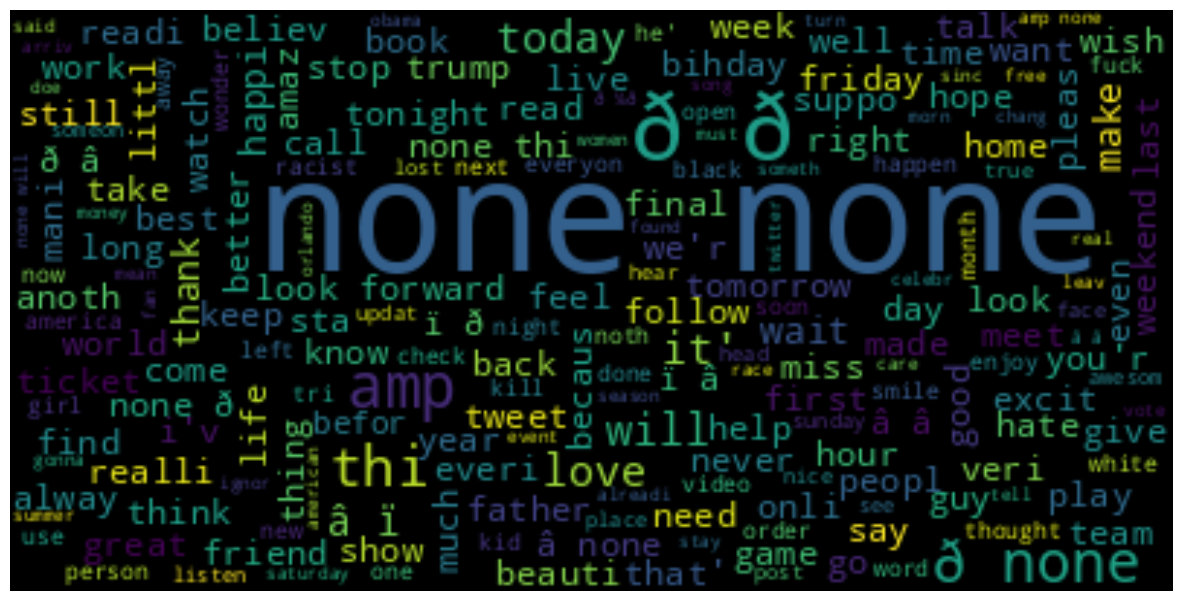

In [177]:
# frequent words visualization for +ve

from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words= ' '.join([sentence for sentence in df['clean_tweet'][df['label']==1]])


wc=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph


plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [178]:
import re

def hashtag_extract(tweets):
    hashtags = []
    # Loop over each tweet in the list
    for tweet in tweets:
        # Find all hashtags in the tweet
        ht = re.findall(r'#(\w+)', tweet)
        # Append the hashtags to the list
        hashtags.extend(ht)
    return hashtags




In [179]:
print(df.columns)


Index(['id', 'label', 'tweet', 'clean_tweet'], dtype='object')


In [180]:
# entract hashtags from non recist /sexest tweets
ht_positive=hashtag_extract(df['tweet'][df['label']==0])

# entract hashtags from  recist /sexest tweets
ht_negative=hashtag_extract(df['tweet'][df['label']==1])

In [181]:
ht_positive[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [182]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [183]:
# Convert strings to lists
ht_positive = [item.split() for item in ht_positive]
ht_negative = [item.split() for item in ht_negative]

# Sum up the lists
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])


In [184]:
ht_positive[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [185]:
freq= nltk.FreqDist(ht_positive)
df= pd.DataFrame({'Hashtag':list(freq.keys()), 'count':list(freq.values())})
df.head()

,Hashtag,count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364


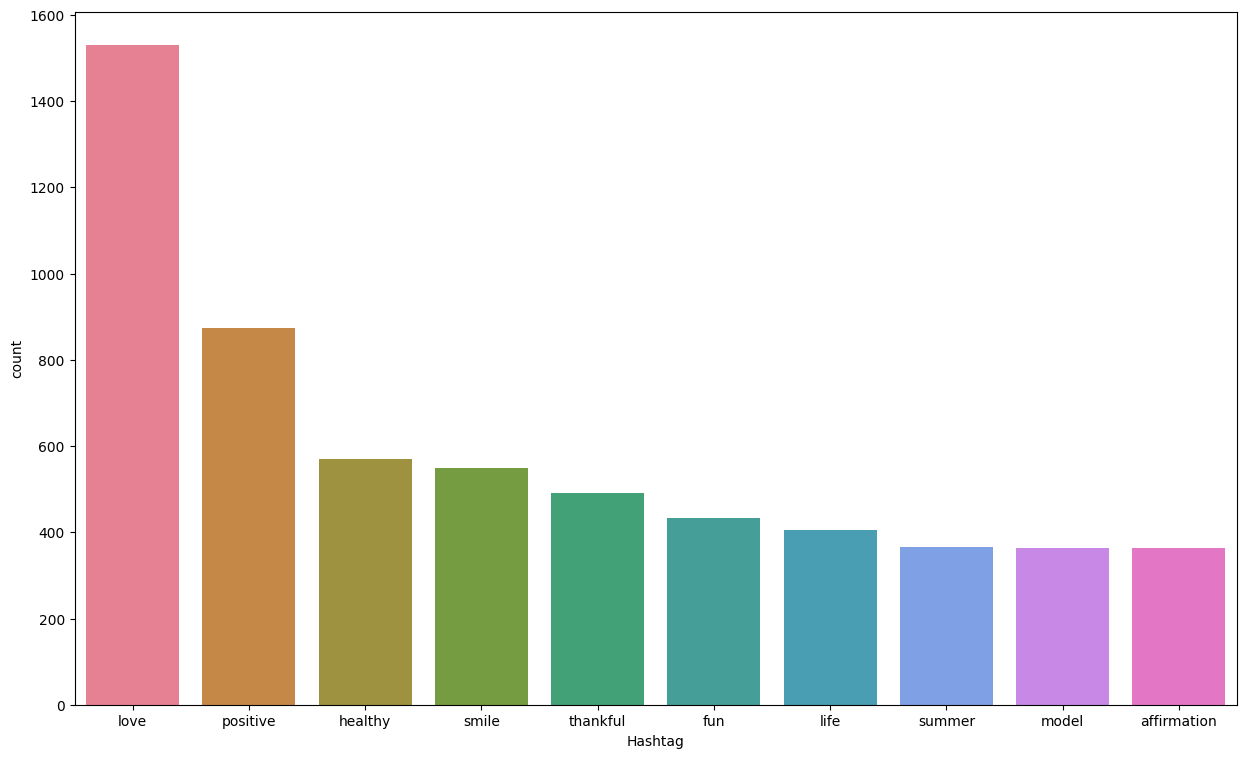

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the top ten hashtags and their counts
# Define the color palette
colors = sns.color_palette("husl", 10)  # Using the 'husl' palette with 10 colors

# Create the bar plot
plt.figure(figsize=(15, 9))
sns.barplot(data=df, x='Hashtag', y='count', palette=colors)
plt.show()


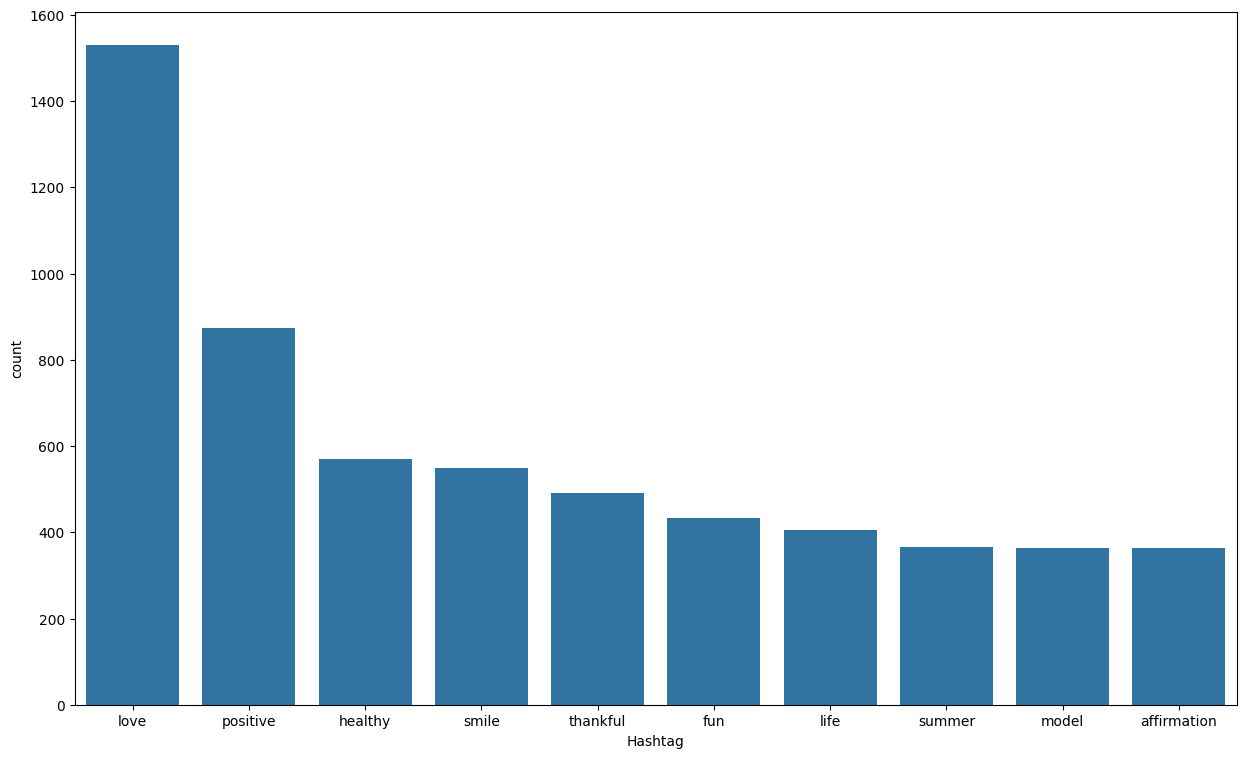

In [190]:
freq= nltk.FreqDist(ht_positive)
df= pd.DataFrame({'Hashtag':list(freq.keys()), 'count':list(freq.values())})
df.head()

# select top ten hashtags

df=df.nlargest(columns='count', n=10)
plt.figure(figsize=(15, 9))
sns.barplot(data=df, x='Hashtag', y='count')
plt.show()

In [191]:
print(df.columns)



Index(['Hashtag', 'count'], dtype='object')


**input split**

In [192]:
# feature extractions

from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.9, min_df=0.01, max_features=1000, stop_words='english')



bow = bow_vectorizer.fit_transform(df['Hashtag'])


In [193]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(bow, df['Hashtag'], random_state=42, test_size=0.25)


**Model **Training

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


In [195]:
#trsining

model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [196]:
# testing

pred = model.predict(x_test)
f1_score(y_test, pred, average='weighted')

0.0

In [197]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)


0.0

In [204]:
# use probability to get output
from sklearn.metrics import f1_score


pred_prob=model.predict_log_proba(x_test)
pred=pred_prob[:,1] >= 0.3

pred=pred.astype(int)
pred = pred.astype(str)
